# Factors that affect a borrower's loan approval
## by RODOLPH MBAIONDOUM

## Investigation Overview
In this investigation, I wanted to look at the factors or features that could help the loan applicant to get the approval status. The main focus was on the some of the variables like 'Term' , 'LoanStatus', 'BorrowerRate' , 'ProsperScore', 'EmploymentStatus', 'Occupation', 'BorrowerHomeowner', 'StatedMonthlyIncome', 'Recommendations', 'LoanOriginalAmount' , 'IncomeRange'.
## Dataset Overview
The 113,937 loans in this ProsperLoan data set have an average of 81 variables, such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more.
I focused on a small number of variables because the project objective itself instructs me to keep the visualization simple.

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [23]:
# Due to many variables in this dataset, I only use few variables. Those are:  
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']
loan_data = data[cols]
loan_data = loan_data.dropna()
loan_data['Term'] = loan_data['Term'].astype('category')
loan_data.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)
num_loan_data= loan_data.loc[:, (loan_data.dtypes == np.float64) | (loan_data.dtypes == np.int64)]
num_loan_data.columns
cat_loan_data = loan_data.loc[:, (loan_data.dtypes == 'object') | (loan_data.dtypes == 'category')]
cat_loan_data.columns

Index(['Term', 'LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus',
       'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

In [24]:
# From above it seems the order has to be maintained becuase this is an ordinal variable
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    loan_data['ProsperRating_Alpha'] = loan_data['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_data['IncomeRange'] = loan_data['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    loan_data['ProsperRating_Alpha'] = loan_data['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_data['IncomeRange'] = loan_data['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

## Prosper rating dependency on Employment status and Income Range
For all the high rating categries like AA, A, B, C , it is quite evident from the graphs that the approval of loans are majorly depend on the applicants income range and Employment status.

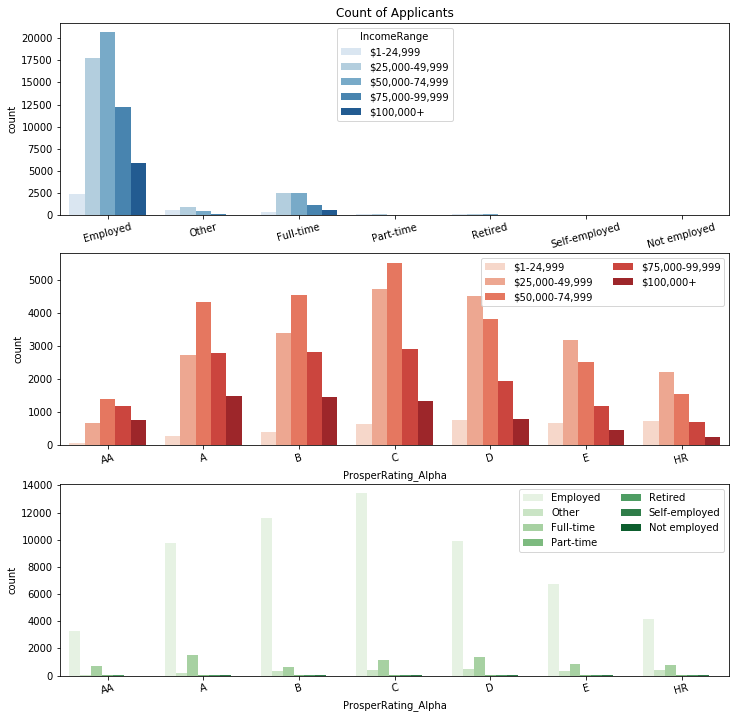

In [25]:
loan_data_sub = loan_data[(loan_data['StatedMonthlyIncome'] <= 10000) ]
loan_data_sub = loan_data_sub[loan_data_sub['IncomeRange'] != 'Not employed']
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_data_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_data_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_data_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

## Applicants rating with borrwers interest rate and homeowner status

We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates

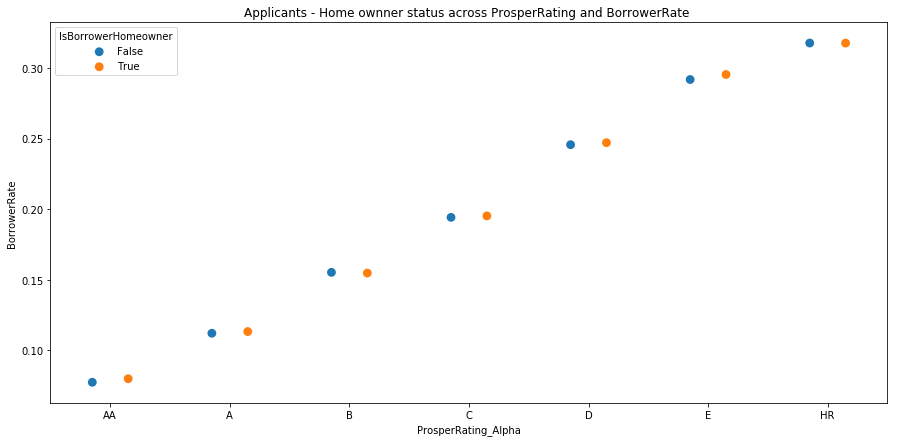

In [26]:
loan_data_sub = loan_data_sub[loan_data_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_data_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_data_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

## Applicants rating with monthly income and Employment Status
High rating is given to applicants with employee status having employed and full time and these appicants have higher monthly salary


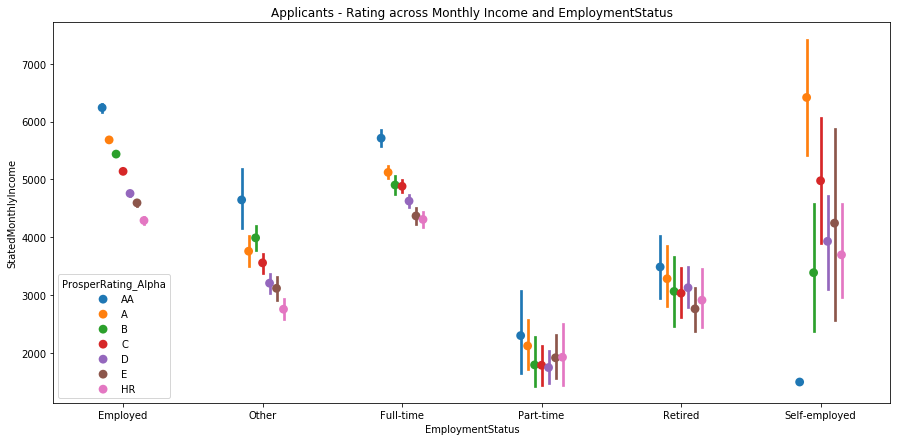

In [27]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_data_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 412981 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 412981 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/